<a href="https://colab.research.google.com/github/manoj-73/Customer-Churn-Prediction-using-Machine-Learning/blob/main/intenship_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully. Shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport

/tmp/ipython-input-1927936555.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


✅ Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
✅ Cross-validation Accuracy: 0.7990

📊 Model Performance:
Accuracy: 0.7935

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



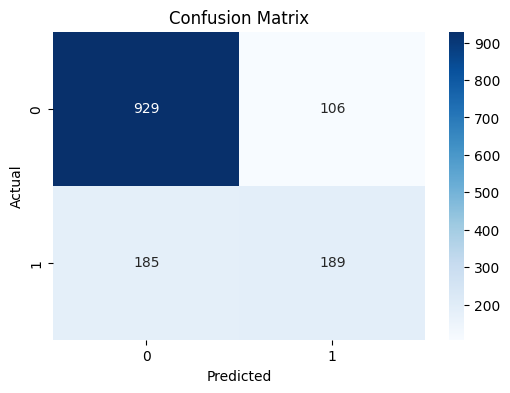

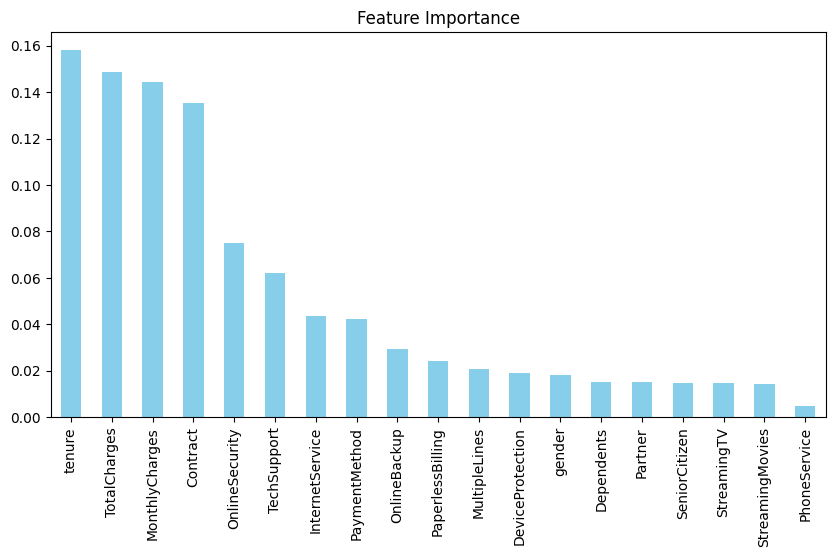

✅ Model saved as customer_churn_model.pkl


In [ ]:
"""
Customer Churn Prediction using Machine Learning
Author: Your Name
Description: End-to-end ML pipeline to predict customer churn based on telecom customer data.
"""

# =============================
# 1. Import Required Libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# =============================
# 2. Load Dataset (Online Source)
# =============================
DATA_URL = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_URL)

print(f"✅ Dataset loaded successfully. Shape: {df.shape}")
print(df.head())

# =============================
# 3. Data Preprocessing
# =============================
# Drop unique identifier
df.drop('customerID', axis=1, inplace=True)

# Handle missing values in TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Feature Scaling
scaler = StandardScaler()
X = df.drop('Churn', axis=1)
y = df['Churn']
X_scaled = scaler.fit_transform(X)

# =============================
# 4. Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# =============================
# 5. Model Training with Hyperparameter Tuning
# =============================
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"✅ Best Parameters: {grid_search.best_params_}")

# =============================
# 6. Cross-Validation Score
# =============================
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='accuracy')
print(f"✅ Cross-validation Accuracy: {cv_scores.mean():.4f}")

# =============================
# 7. Model Evaluation
# =============================
y_pred = best_model.predict(X_test)
print("\n📊 Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Plot
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Feature Importance")
plt.show()

# =============================
# 8. Save Model for Deployment
# =============================
joblib.dump(best_model, "customer_churn_model.pkl")
print("✅ Model saved as customer_churn_model.pkl")
